In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('C:/Users/bhatt/OneDrive/Desktop/whisper-main/Titanic_Dataset/train.csv')

test_df = pd.read_csv('C:/Users/bhatt/OneDrive/Desktop/whisper-main/Titanic_Dataset/test.csv')

In [3]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: ylabel='Density'>

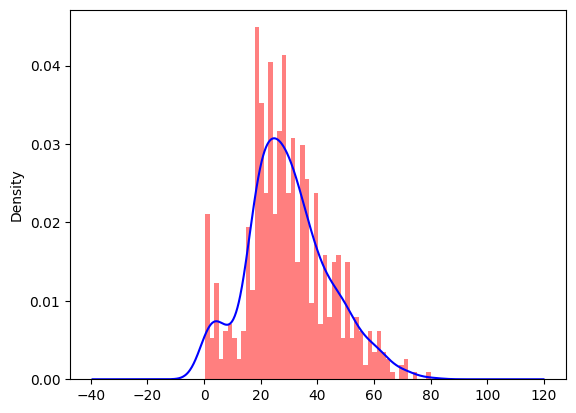

In [5]:
ax = train_df["Age"].hist(bins = 50, density = True, color = 'red', alpha = 0.5)
train_df['Age'].plot(kind = 'density', color = 'blue')

S    644
C    168
Q     77
Name: Embarked, dtype: int64
S


<Axes: xlabel='Embarked', ylabel='count'>

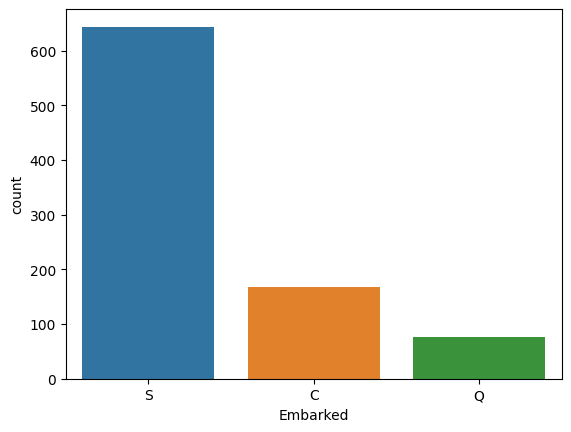

In [6]:
print(train_df['Embarked'].value_counts())
print(train_df['Embarked'].value_counts().idxmax())
sns.countplot(x = 'Embarked', data = train_df)

In [7]:
train_data = train_df.copy()

In [8]:
train_df['Age'].median()

28.0

In [9]:
train_data['Age'].fillna(train_df['Age'].median(), inplace = True)
train_data['Embarked'].fillna(train_df.Embarked.value_counts().idxmax(), inplace = True)
train_data.drop('Cabin', axis = 1, inplace = True)

In [10]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

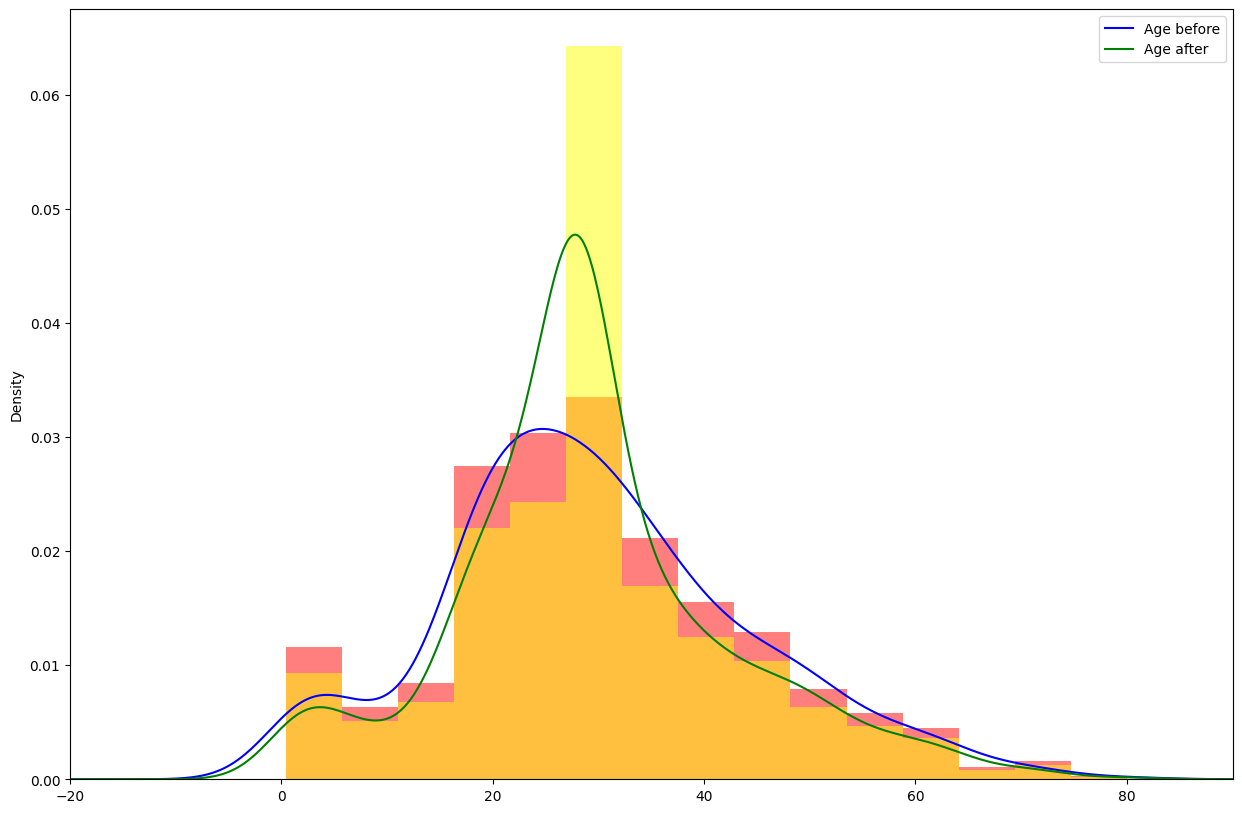

In [11]:
plt.figure(figsize = (15, 10))
ax = train_df["Age"].hist(bins = 15, density = True, color = 'red', alpha = 0.5)
train_df['Age'].plot(kind = 'density', color = 'blue')
ax = train_data["Age"].hist(bins = 15, density = True, color = 'yellow', alpha = 0.5)
train_data['Age'].plot(kind = 'density', color = 'green')
plt.xlim(-20, 90)
ax.legend(['Age before', 'Age after'])

In [12]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [13]:
train_data = pd.get_dummies(train_data, columns = ['Sex', 'Embarked'])

In [14]:
train_data.drop('PassengerId', axis = 1, inplace = True)
train_data.drop('Name', axis = 1, inplace = True)
train_data.drop('Ticket', axis = 1, inplace = True)

In [15]:
# train_data['Sex_female'] = np.where(train_data['Sex_female'] == True, 1, 0)
# train_data['Sex_male'] = np.where(train_data['Sex_male'] == True, 1, 0)
# train_data['Embarked_C'] = np.where(train_data['Embarked_C'] == True, 1, 0)
# train_data['Embarked_Q'] = np.where(train_data['Embarked_Q'] == True, 1, 0)
# train_data['Embarked_S'] = np.where(train_data['Embarked_S'] == True, 1, 0)

C:\Users\bhatt\AppData\Local\Temp\ipykernel_35924\2853737527.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(train_data['Age'][train_data.Survived == 1], color = 'green', shade = True)
C:\Users\bhatt\AppData\Local\Temp\ipykernel_35924\2853737527.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_data['Age'][train_data.Survived == 0], color = 'red', shade = True)


(-10.0, 90.0)

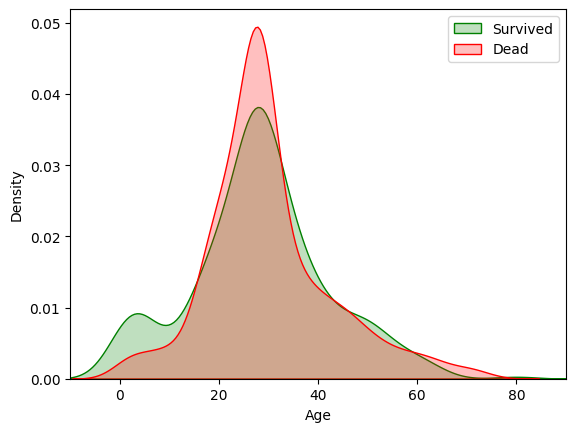

In [16]:
ax = sns.kdeplot(train_data['Age'][train_data.Survived == 1], color = 'green', shade = True)
sns.kdeplot(train_data['Age'][train_data.Survived == 0], color = 'red', shade = True)
plt.legend(['Survived', 'Dead'])
plt.xlim(-10, 90)

C:\Users\bhatt\AppData\Local\Temp\ipykernel_35924\3830224982.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(train_data['Fare'][train_data.Survived == 1], color = 'green', shade = True)
C:\Users\bhatt\AppData\Local\Temp\ipykernel_35924\3830224982.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_data['Fare'][train_data.Survived == 0], color = 'red', shade = True)


(-50.0, 200.0)

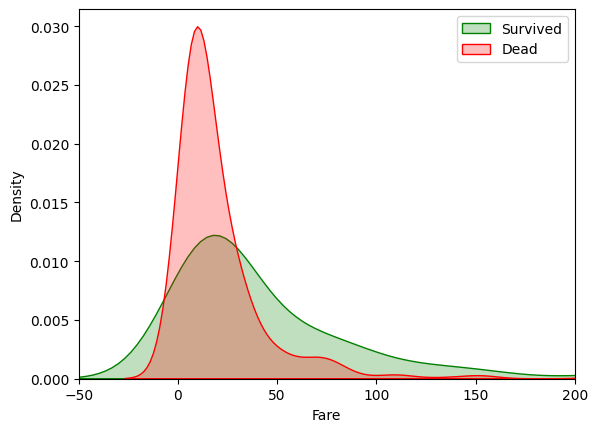

In [17]:
ax = sns.kdeplot(train_data['Fare'][train_data.Survived == 1], color = 'green', shade = True)
sns.kdeplot(train_data['Fare'][train_data.Survived == 0], color = 'red', shade = True)
plt.legend(['Survived', 'Dead'])
plt.xlim(-50, 200)

<Axes: xlabel='Pclass', ylabel='Survived'>

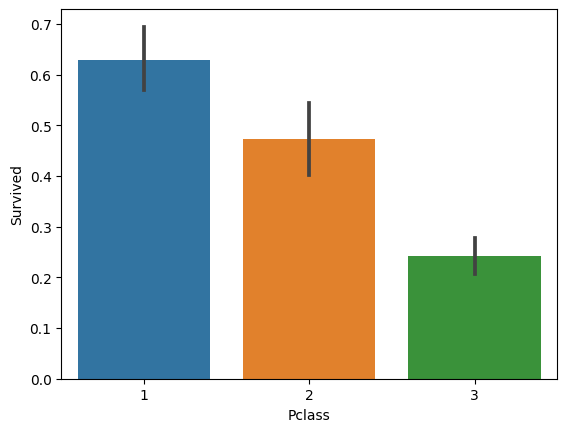

In [18]:
sns.barplot(x = 'Pclass', y = 'Survived', data = train_data)

<Axes: xlabel='Embarked', ylabel='Survived'>

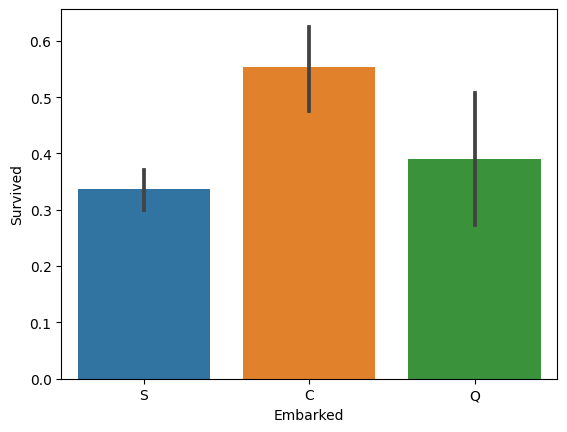

In [19]:
sns.barplot(x = 'Embarked', y = 'Survived', data = train_df)

<Axes: xlabel='SibSp', ylabel='Survived'>

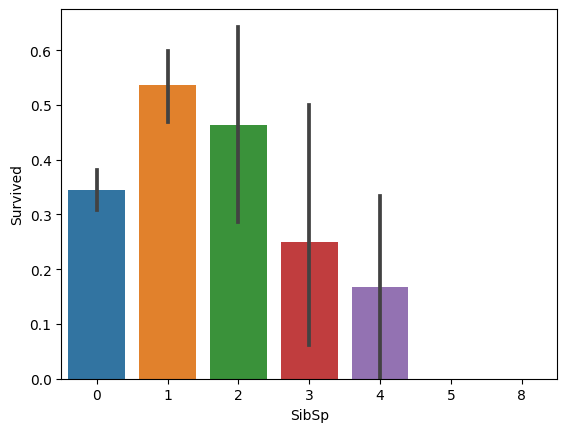

In [20]:
sns.barplot(x = 'SibSp', y = 'Survived', data = train_df)

<Axes: xlabel='Parch', ylabel='Survived'>

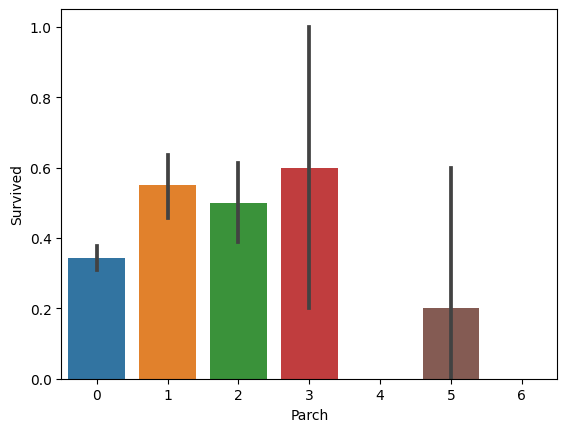

In [21]:
sns.barplot(x = 'Parch', y = 'Survived', data = train_df)

<Axes: xlabel='Sex', ylabel='Survived'>

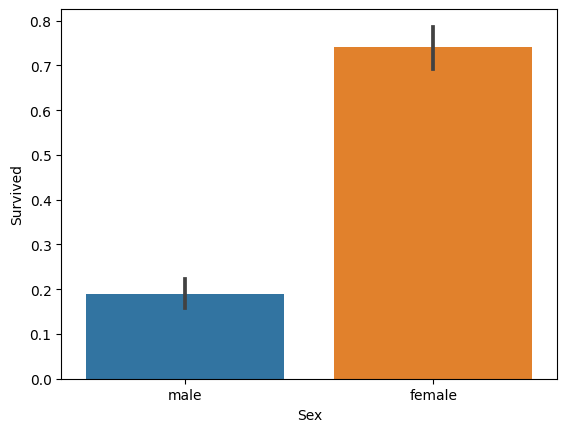

In [22]:
sns.barplot(x = 'Sex', y = 'Survived', data = train_df)

<Axes: xlabel='Sex', ylabel='Fare'>

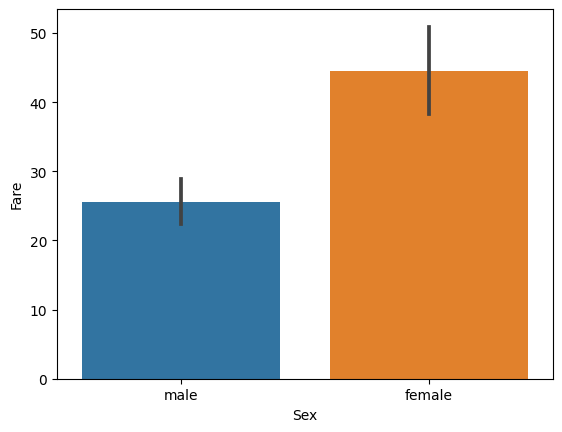

In [23]:
sns.barplot(x = 'Sex', y = 'Fare', data = train_df)

In [24]:
train_data['Travel_Alone'] = np.where((train_data['SibSp'] + train_data['Parch']) > 0, 0, 1)

In [25]:
train_data.drop('SibSp', axis = 1, inplace = True)
train_data.drop('Parch', axis = 1, inplace = True)

In [26]:
train_data

,Survived,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Travel_Alone
0,0,3,22.0,7.2500,0,1,0,0,1,0
1,1,1,38.0,71.2833,1,0,1,0,0,0
2,1,3,26.0,7.9250,1,0,0,0,1,1
3,1,1,35.0,53.1000,1,0,0,0,1,0
4,0,3,35.0,8.0500,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,0,1,0,0,1,1
887,1,1,19.0,30.0000,1,0,0,0,1,1
888,0,3,28.0,23.4500,1,0,0,0,1,0
889,1,1,26.0,30.0000,0,1,1,0,0,1


<Axes: xlabel='Travel_Alone', ylabel='Survived'>

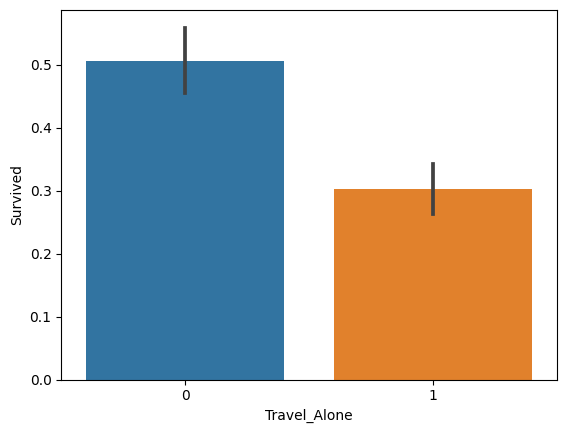

In [27]:
sns.barplot(x = 'Travel_Alone', y = 'Survived', data = train_data)

<Axes: >

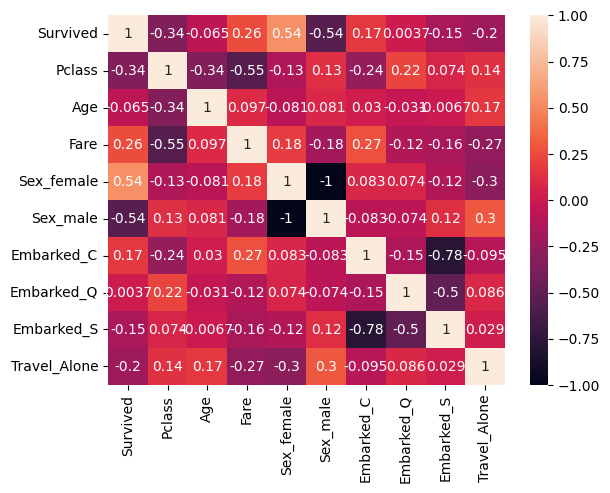

In [28]:
sns.heatmap(train_data.corr(), annot = True)

In [29]:
train_data

,Survived,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Travel_Alone
0,0,3,22.0,7.2500,0,1,0,0,1,0
1,1,1,38.0,71.2833,1,0,1,0,0,0
2,1,3,26.0,7.9250,1,0,0,0,1,1
3,1,1,35.0,53.1000,1,0,0,0,1,0
4,0,3,35.0,8.0500,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,0,1,0,0,1,1
887,1,1,19.0,30.0000,1,0,0,0,1,1
888,0,3,28.0,23.4500,1,0,0,0,1,0
889,1,1,26.0,30.0000,0,1,1,0,0,1


In [30]:
cols_model = ['Pclass', 'Age', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Travel_Alone']
train_X = train_data[cols_model]
train_Y = train_data['Survived']

In [31]:
print(type(train_X), type(train_Y))
train_X = train_X.values
train_Y = train_Y.values
print(type(train_X), type(train_Y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [32]:
split = 0.9
X_train = train_X[:int(split * train_X.shape[0]), :]
Y_train = train_Y[:int(split * train_Y.shape[0])]
X_test = train_X[int(split * train_X.shape[0]):, :]
Y_test = train_Y[int(split * train_Y.shape[0]):]

In [33]:
train_X

array([[ 3.    , 22.    ,  7.25  , ...,  0.    ,  1.    ,  0.    ],
       [ 1.    , 38.    , 71.2833, ...,  0.    ,  0.    ,  0.    ],
       [ 3.    , 26.    ,  7.925 , ...,  0.    ,  1.    ,  1.    ],
       ...,
       [ 3.    , 28.    , 23.45  , ...,  0.    ,  1.    ,  0.    ],
       [ 1.    , 26.    , 30.    , ...,  0.    ,  0.    ,  1.    ],
       [ 3.    , 32.    ,  7.75  , ...,  1.    ,  0.    ,  1.    ]])

In [34]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(801, 9) (801,) (90, 9) (90,)


In [35]:
ones = np.ones((X_train.shape[0], 1))
X_train = np.hstack((ones, X_train))
ones = np.ones((X_test.shape[0], 1))
X_test = np.hstack((ones, X_test))

In [36]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(801, 10) (801,) (90, 10) (90,)


In [37]:
def sigmoid(X):
    return 1/(1 + np.exp(-X))

In [38]:
def hypothesis(X, weight):
    return sigmoid(np.dot(X, weight))

In [39]:
def loss(X, Y, weight):
    pred = hypothesis(X, weight)
    loss = np.mean(Y * np.log(pred) + (1 - Y) * np.log(1 - pred))
    return -1 * loss

In [40]:
def gradient(X, Y, weight):
    pred = hypothesis(X, weight)
    grad = np.dot(X.T, (Y - pred))
    return grad/X.shape[0]

In [41]:
def gradient_descent(X, Y):
    weights = np.zeros((X.shape[1], ))
    epochs = 100000
    lr_rate = 0.003
    list_loss = []
    
    for i in range(epochs):
        grad = gradient(X, Y, weights)
        list_loss.append(loss(X, Y, weights))
        print(f'On: {i}', end = '\r')
        weights = weights + (lr_rate * grad)
    return weights, list_loss

In [42]:
weights, list_loss = gradient_descent(X_train, Y_train)

In [43]:
list_loss

[0.6931471805599451,
 0.6482165240738683,
 0.6365160504362694,
 0.6322504134892498,
 0.6294194740352896,
 0.6281237636700447,
 0.6271042578027655,
 0.6266084734328731,
 0.6262674933922432,
 0.6260527444269302,
 0.6258845061442028,
 0.625742246720535,
 0.6256106447032322,
 0.6254842388111151,
 0.6253601520898301,
 0.625237222072142,
 0.6251149047601539,
 0.6249929677464648,
 0.6248713057341435,
 0.6247498721512466,
 0.6246286457216262,
 0.6245076166298222,
 0.6243867801477156,
 0.6242661338654434,
 0.6241456764238522,
 0.6240254069500082,
 0.6239053247950588,
 0.6237854294160711,
 0.6236657203198115,
 0.623546197037395,
 0.6234268591118236,
 0.623307706092454,
 0.6231887375321524,
 0.6230699529860823,
 0.6229513520110359,
 0.6228329341651732,
 0.6227146990078588,
 0.6225966460996094,
 0.6224787750020515,
 0.6223610852779109,
 0.6222435764910023,
 0.6221262482062251,
 0.6220090999895608,
 0.6218921314080706,
 0.6217753420298939,
 0.6216587314242463,
 0.6215422991614173,
 0.62142604481277

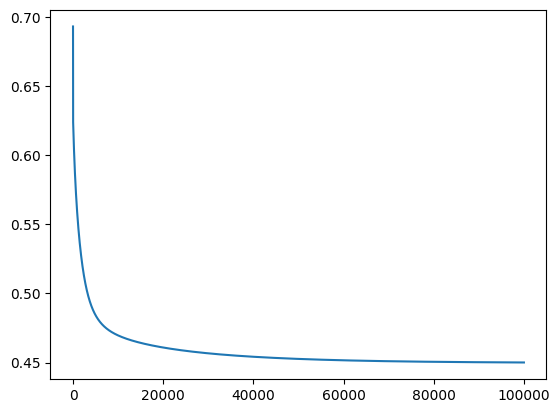

In [44]:
plt.plot(list_loss)

In [45]:
list_loss[-1]

0.4500639359968329

In [46]:
weights

array([ 1.64674796e+00, -1.04845818e+00, -2.86858506e-02,  7.94682108e-04,
        2.14187844e+00, -4.95130484e-01,  7.17785540e-01,  6.10701638e-01,
        3.18260778e-01,  1.53384121e-01])

In [47]:
pred = []

for i in range(X_test.shape[0]):
    y_hat = hypothesis(X_test[i], weights)
#     pred.append(y_hat)
    print(y_hat, Y_test[i])
    if y_hat >= 0.5:
        pred.append(1)
    else:
        pred.append(0)

0.7579677484332348 1
0.5501402960657974 1
0.2173372629354125 1
0.0918638077061842 1
0.0827774172460834 0
0.3672705887576446 0
0.6467377305410951 0
0.17050233578347254 0
0.8960413690112959 1
0.09434704478022532 0
0.06775680815772327 0
0.18704681370741225 0
0.6930146711162394 0
0.0838897390376005 0
0.4431470295719828 0
0.6133509961912418 0
0.25211419811106067 0
0.06005965750578257 0
0.12562773505861616 0
0.8376801450000262 1
0.09197574385022286 1
0.3739617073281803 0
0.5490686391441002 1
0.15429176363316963 0
0.11636090678043201 0
0.0927576205126222 0
0.44354362241310563 1
0.1164262907617826 1
0.8171064280260631 1
0.7195511238070156 1
0.3461632816243199 1
0.1278564022891888 0
0.1019589826002656 0
0.1158980334522114 0
0.9172298035046704 1
0.1073949451606585 0
0.08956818770210813 0
0.0835422718959525 1
0.5485285502272973 1
0.11011849234524514 0
0.2840859187490158 0
0.9413317814525227 1
0.10840541480866339 0
0.11890006556963807 0
0.06175025582925401 0
0.08140340453914717 0
0.107137692135876

In [48]:
corr = 0

for i in range(Y_test.shape[0]):
    if pred[i] == Y_test[i]:
        corr += 1
print(corr/Y_test.shape[0])

0.8
